In [2]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [3]:
dataset = pd.read_csv("Titanic_Dataset[70].csv")

In [43]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#finding count of male and female
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
 import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

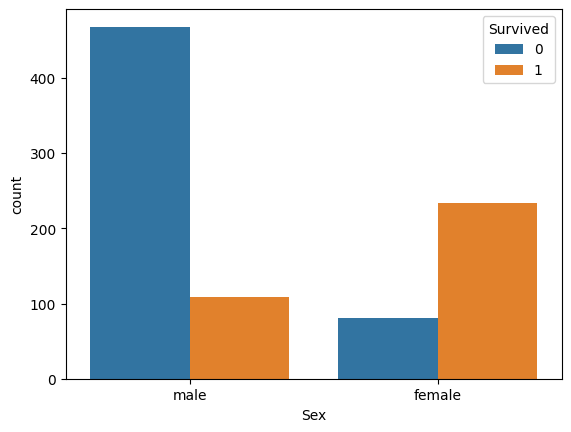

In [9]:
sns.countplot(x="Sex",hue="Survived",data=dataset)
#How many survived in each Gender

<Axes: xlabel='Pclass', ylabel='count'>

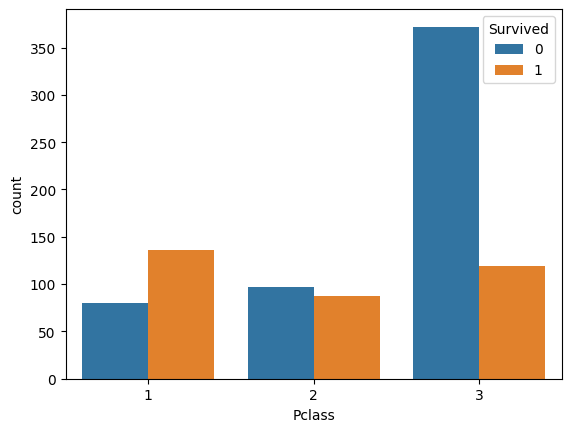

In [10]:
sns.countplot(x="Pclass",hue="Survived",data=dataset)
#How many survived based on class

<Axes: xlabel='Embarked', ylabel='count'>

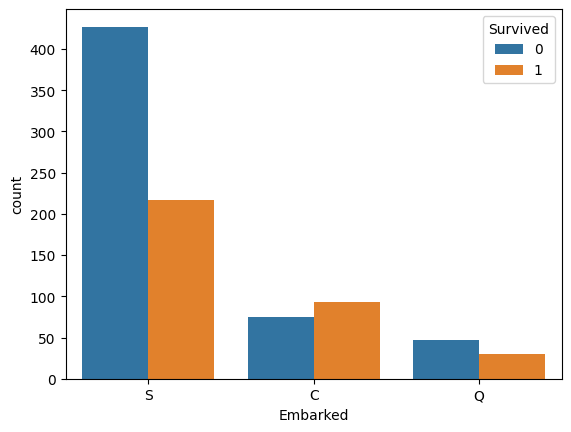

In [11]:
sns.countplot(x="Embarked",hue="Survived",data=dataset)
#how many survived based on Embarked

<Axes: xlabel='Pclass', ylabel='count'>

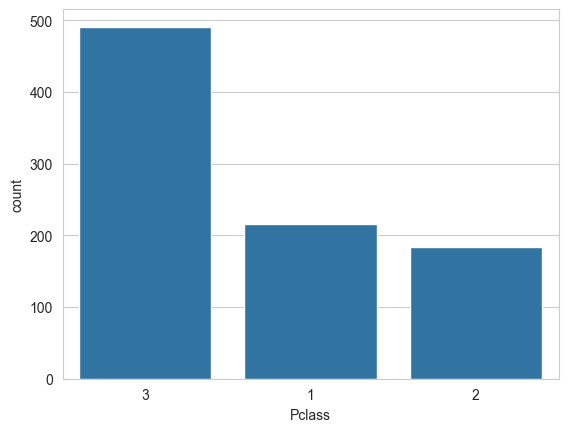

In [60]:
sns.countplot(x = 'Pclass', data=dataset, order = dataset['Pclass'].value_counts().index)
#count of each class

<Axes: xlabel='Embarked', ylabel='count'>

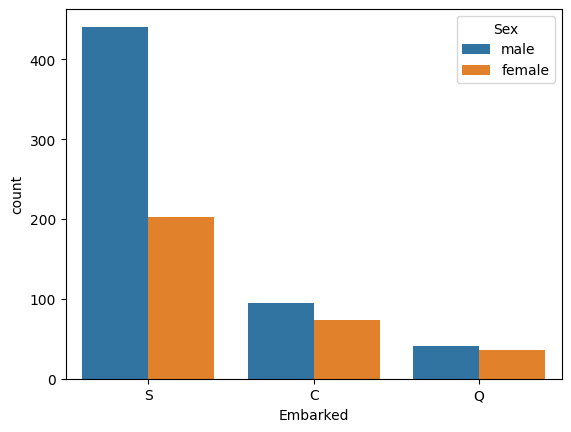

In [13]:
sns.countplot(x="Embarked",hue="Sex",data=dataset)
#how many genders based on Embarked

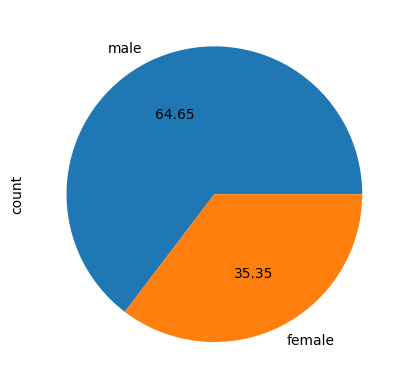

In [26]:
dataset['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()
#percentage of male and female of total passengers

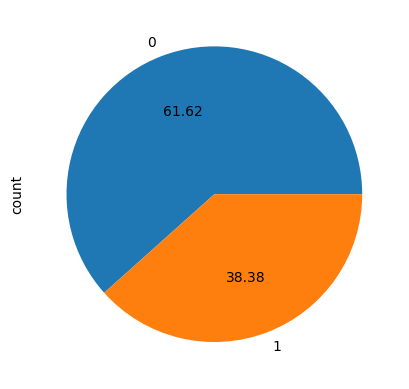

In [25]:
dataset['Survived'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()
#percentage of survived and not from total passengers

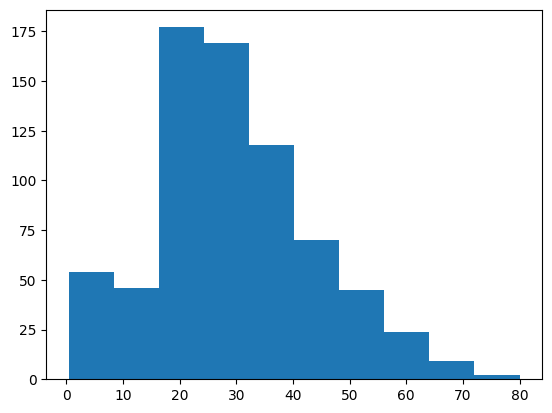

In [12]:
plt.hist(dataset['Age'], bins=10)

plt.show()

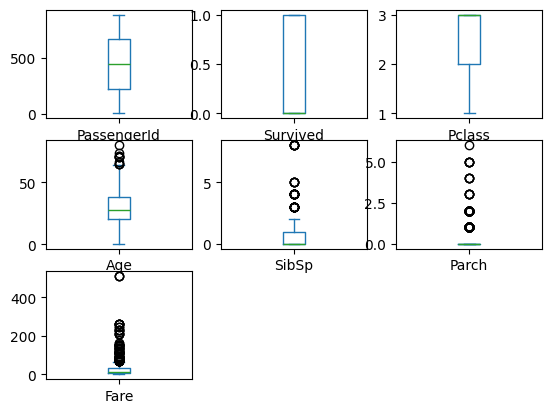

In [13]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

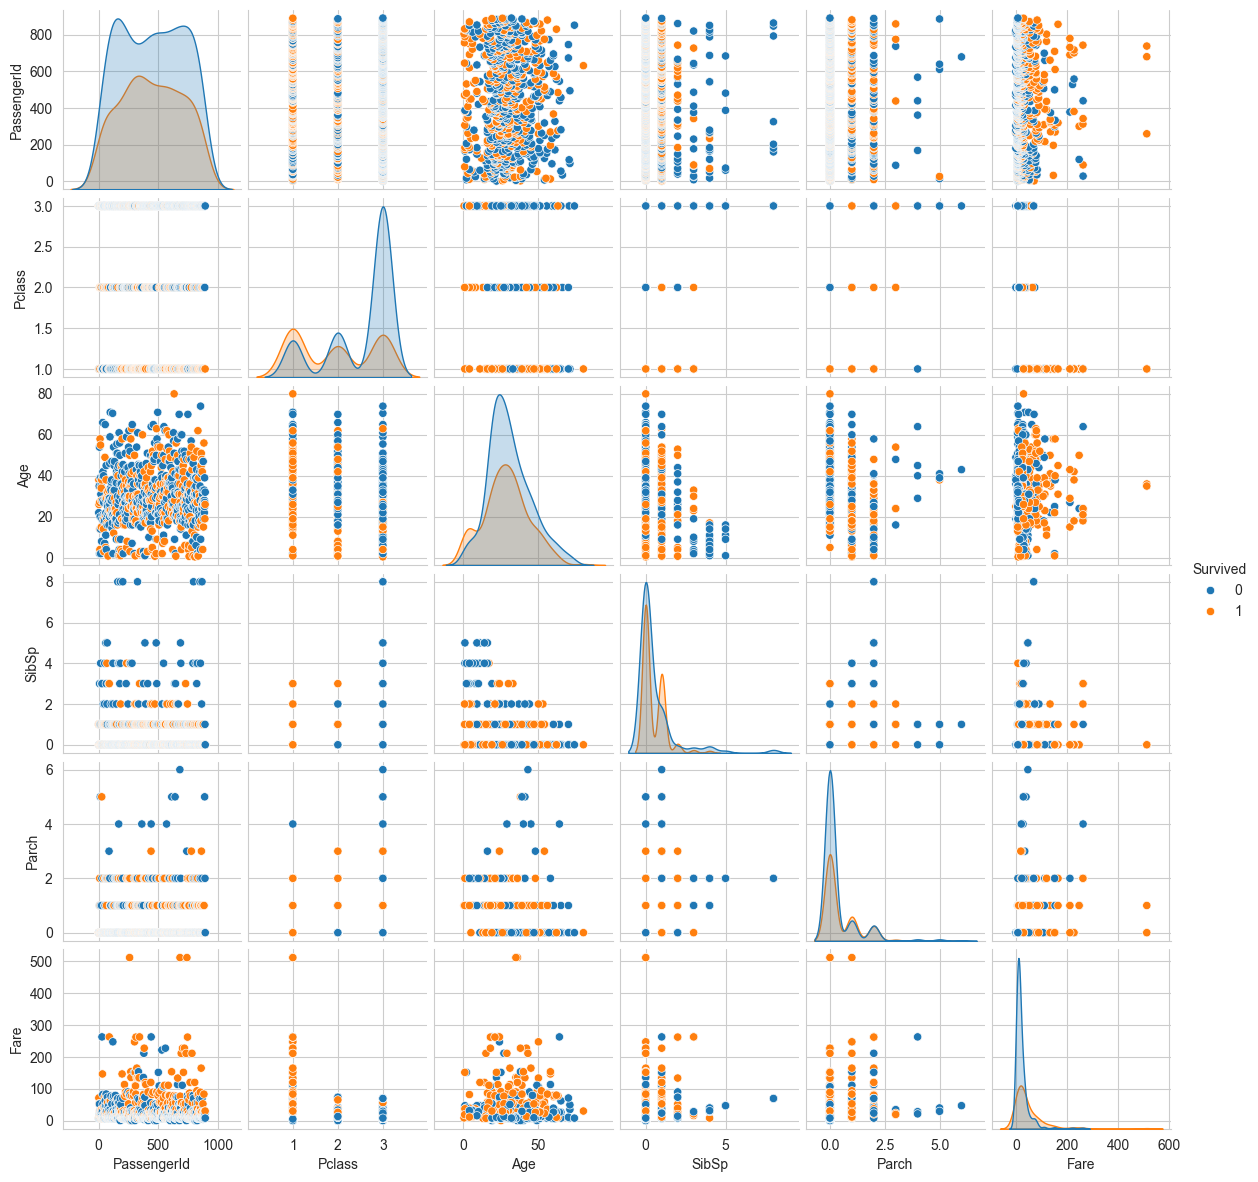

In [22]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="Survived", height=2)
plt.show()

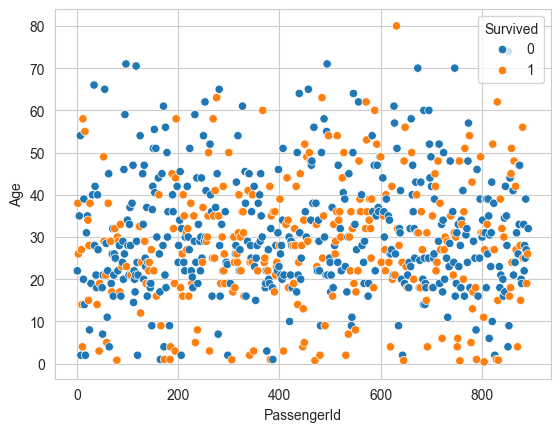

In [23]:
sns.scatterplot(data=dataset,x=dataset["PassengerId"], y=dataset["Age"], hue=dataset["Survived"])
plt.show()

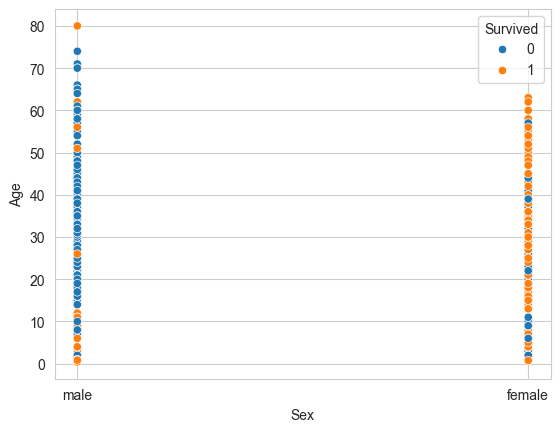

In [24]:
sns.scatterplot(data=dataset,x=dataset["Sex"], y=dataset["Age"], hue=dataset["Survived"])
plt.show()

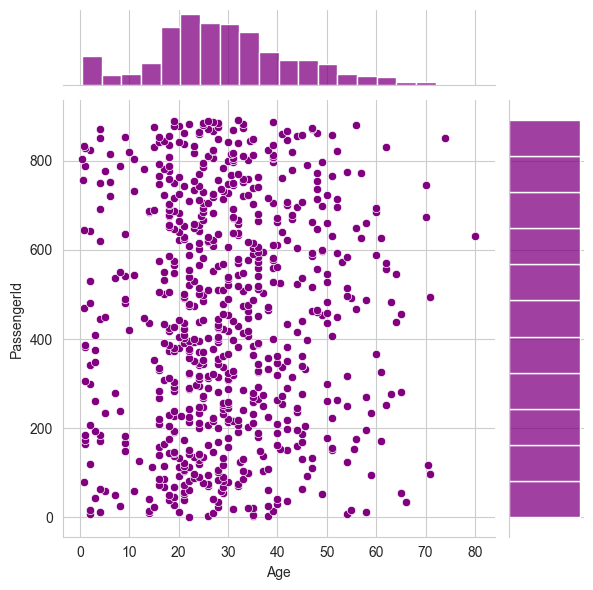

In [26]:
sns.jointplot(data=dataset, x='Age', y='PassengerId',color='purple')

<Axes: xlabel='Pclass', ylabel='Age'>

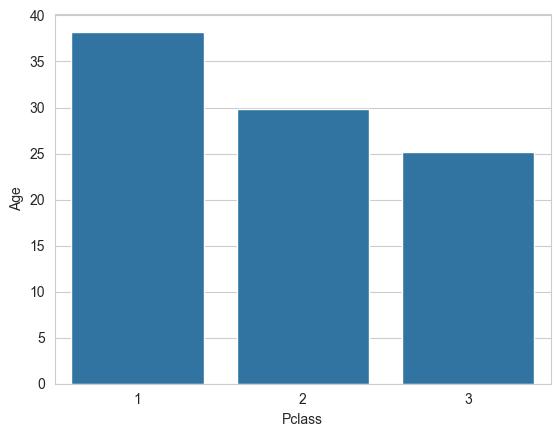

In [30]:
sns.barplot(data=dataset, x='Pclass',y='Age',errorbar=None)
#how many age class in each class

In [77]:
ds=dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [50]:
ds.shape

(891, 8)

In [113]:
ds.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,3
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
8,1,3,1,27.000000,0,2,11.1333,1
9,1,2,1,14.000000,1,0,30.0708,3


In [53]:
ds.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

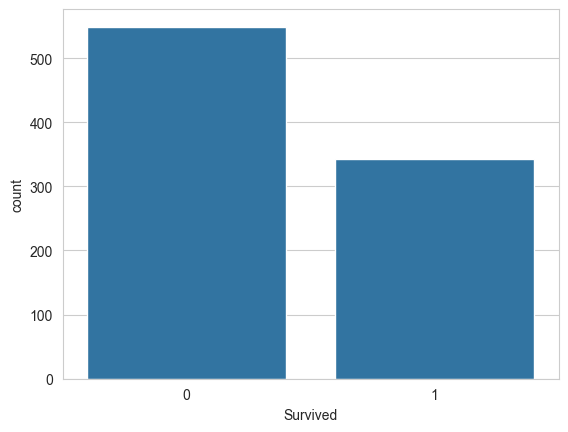

In [65]:
sns.countplot(x = 'Survived', data=ds, order = ds['Survived'].value_counts().index)

In [90]:
ds.isna().sum()
#Missing values in each column

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [80]:
#Filling age with mean of age
#inplace=True modifies original dataset and inplace=False original dataset unchanged
ds['Age'].fillna(ds['Age'].mean(),inplace=True)

C:\Users\subin\AppData\Local\Temp\ipykernel_3248\1057166245.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Age'].fillna(ds['Age'].mean(),inplace=True)


In [85]:
#filling fare with mean of fare
ds['Fare'].fillna(ds['Fare'].mean(),inplace=True)

C:\Users\subin\AppData\Local\Temp\ipykernel_3248\2539582160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds['Fare'].fillna(ds['Fare'].mean(),inplace=True)


In [86]:
#filling embarked with value"Unknown"
ds["Embarked"].fillna("Unknown", inplace=True) 

C:\Users\subin\AppData\Local\Temp\ipykernel_3248\1979572417.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds["Embarked"].fillna("Unknown", inplace=True)


In [89]:
ds.isna().sum()
#checking for null value again

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [108]:
#finding category of Gender
ds['Sex'].unique()

array(['male', 'female'], dtype=object)

In [110]:
#mapping male =0,female 1
gen = {"male":0,'female':1}
ds['Sex'] = ds['Sex'].map(gen)

In [109]:
#finding category of gender
ds['Embarked'].unique()

array(['S', 'C', 'Q', 'Unknown'], dtype=object)

In [112]:
#mapping with numerical value
emb = {"Unknown":0,"S":1,'Q':2,'C':3}
ds['Embarked'] = ds['Embarked'].map(emb)

In [114]:
ds['Embarked'].value_counts()

Embarked
1    644
3    168
2     77
0      2
Name: count, dtype: int64

In [146]:
ds.groupby('Survived').size()

Survived
0    549
1    815
dtype: int64

In [141]:
from sklearn.utils import resample
# sfalse variable has dataset (dataframe) with rows only having survived column value equals to zero.
sfalse = ds[(ds['Survived']==0)] # subset of passengers who demised
strue = ds[(ds['Survived']==1)] # subset of passengers who survived
# two dataframes with minority and majority class

strue_upsampled = resample(strue,
                                 replace=True,
                                 n_samples= 815,
                                 random_state=42) # survived people are upsampled to make them majority and they are greater then non-survived people now


# Combine majority class with upsampled minority class
ds = pd.concat([sfalse,strue_upsampled]) # average and

In [143]:
sfalse.head(2000)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
...,...,...,...,...,...,...,...,...
884,0,3,0,25.000000,0,0,7.0500,1
885,0,3,1,39.000000,0,5,29.1250,2
886,0,2,0,27.000000,0,0,13.0000,1
888,0,3,1,29.699118,1,2,23.4500,1


In [144]:
strue.head(2000)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
781,1,1,1,17.000000,1,0,57.0000,1
612,1,3,1,29.699118,1,0,15.5000,2
591,1,1,1,52.000000,1,0,78.2667,3
383,1,1,1,35.000000,1,0,52.0000,1
554,1,3,1,22.000000,0,0,7.7750,1
...,...,...,...,...,...,...,...,...
809,1,1,1,33.000000,1,0,53.1000,1
857,1,1,0,51.000000,0,0,26.5500,1
248,1,1,0,37.000000,1,1,52.5542,1
369,1,1,1,24.000000,0,0,69.3000,3


In [147]:
ds.head(2000)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
...,...,...,...,...,...,...,...,...
435,1,1,1,14.000000,1,2,120.0000,1
887,1,1,1,19.000000,0,0,30.0000,1
369,1,1,1,24.000000,0,0,69.3000,3
554,1,3,1,22.000000,0,0,7.7750,1


In [148]:
ds.groupby('Survived').size()


Survived
0    549
1    815
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

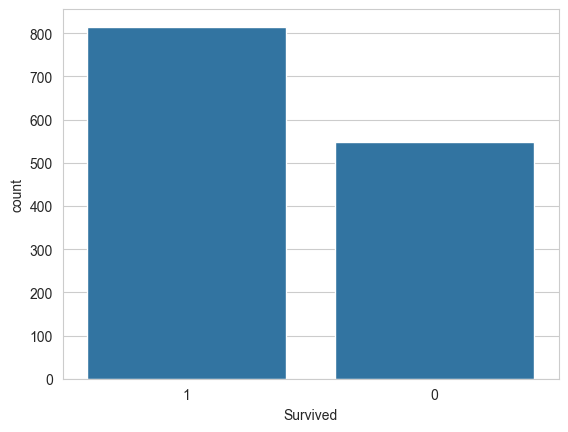

In [149]:
sns.countplot(x = 'Survived', data=ds, order = ds['Survived'].value_counts().index)

In [155]:
ds.duplicated().sum() 
#Check if there is any duplicated row present

752

In [153]:
ds.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
4,0,3,0,35.000000,0,0,8.0500,1
5,0,3,0,29.699118,0,0,8.4583,2
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,0,2.000000,3,1,21.0750,1
12,0,3,0,20.000000,0,0,8.0500,1
13,0,3,0,39.000000,1,5,31.2750,1
14,0,3,1,14.000000,0,0,7.8542,1
16,0,3,0,2.000000,4,1,29.1250,2
18,0,3,1,31.000000,1,0,18.0000,1


In [157]:
x=ds.iloc[:,1:].values #index 1 to end as features (Pclass to Embarked)
y=ds.iloc[:,0].values #0th as expected result (Survived or not)

In [158]:
x

array([[ 3.        ,  0.        , 22.        , ...,  0.        ,
         7.25      ,  1.        ],
       [ 3.        ,  0.        , 35.        , ...,  0.        ,
         8.05      ,  1.        ],
       [ 3.        ,  0.        , 29.69911765, ...,  0.        ,
         8.4583    ,  2.        ],
       ...,
       [ 1.        ,  1.        , 24.        , ...,  0.        ,
        69.3       ,  3.        ],
       [ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.775     ,  1.        ],
       [ 1.        ,  1.        , 52.        , ...,  1.        ,
        93.5       ,  1.        ]])

In [45]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [47]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (1141, 7)
y_train:  (1141,)
x_test:  (489, 7)
y_test:  (489,)


In [73]:
#Logistic Regression

from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(max_iter = 600) #loading the algorith
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr)*100)

Accuracy :  84.86707566462167


In [74]:
#k neigbours Clssifier

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_pred_knn = model_knn.predict(x_test)

C:\Users\faris\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn)*100)

Accuracy :  71.16564417177914


In [77]:
#Desicion tree classifier

from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_dt)*100)

Accuracy :  84.25357873210633


In [52]:
#neive bayes 

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)

y_pred_nb = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb)*100)

Accuracy :  83.43558282208589


In [53]:
#support vector machine

from sklearn.svm import SVC
model_svc = SVC(gamma='auto')
model_svc.fit(x_train,y_train)
y_pred_svc = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_svc)*100)

Accuracy :  83.43558282208589


In [91]:
#logistics and Desicion tree have almost same accuracy, here using highest Logistics

#class,(male 0, female 1) ,age,sibsp,parch,Fare,Embarked 
Xnew = [[1,1,50,0,2,100.00,3]]
ynew = model_lr.predict(Xnew)
print(ynew)

[1]
